In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import h5py as hp

from pic.functions import smooth
from pic.constantes import me

In [3]:

def meanfield(f,key):
    """read the HDF5 file f in order to calculate the mean""
    """
    
    groupNames = [k for k in f.keys()]
    
    groupNames.sort(key=float)

    datasetNames = [k for k in f[groupNames[0]].keys()]
    
    if key not in datasetNames:
        raise NameError('Wrong HDF5 key for dataset !'+key+" is not in "+str(datasetNames) )
    
    for gn in groupNames[:]:
        if gn == groupNames[0]:
            tab = f[gn][key][()]
        else:
            tab += f[gn][key][()] 
        
    return tab/(len(groupNames))


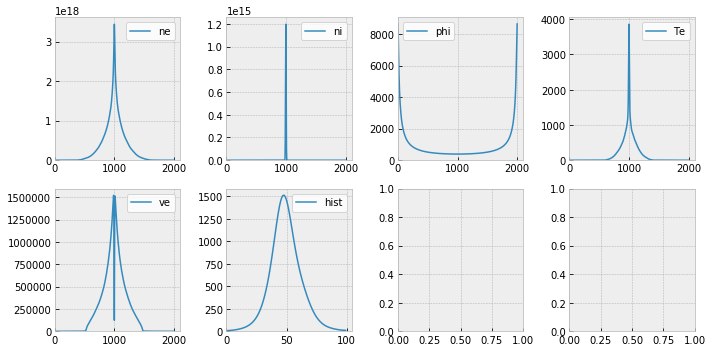

In [7]:
fileName = "cases/inft_sh/runMirrorLonguer.h5"

f = hp.File(fileName,"r")
# print([k for k in f.keys()])
keys = ['ne','ni',"phi",
       'Te','ve',"hist"]

Nlines = 2
Ncol = int(len(keys)/2)+1
with plt.style.context("bmh"):
    fig, axarr = plt.subplots(Nlines,Ncol, figsize=(10,5))

for key,ax in zip(keys, axarr.flatten()):
    vect = meanfield(f,key)
    ax.plot(abs(smooth(vect)), label = key)
    ax.legend()
    ax.set_ylim(ymin=0)
    ax.set_xlim(xmin=0,
               )
plt.tight_layout()

f.close()

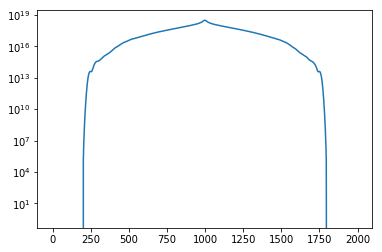

In [8]:
f = hp.File(fileName,"r")

ni = meanfield(f,"ni")[:-2]
ne = meanfield(f,"ne")[:-2]
f.close()

plt.plot(smooth(smooth(abs(ni - ne))))
plt.yscale('log')

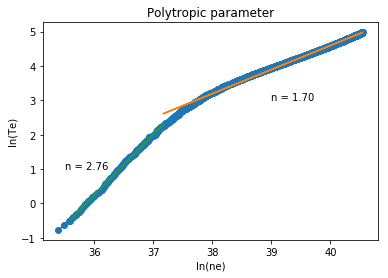

In [14]:
f = hp.File(fileName,"r")
NCutPlot = 10
Te = meanfield(f,"Te")[NCutPlot:-1-NCutPlot]
ne = meanfield(f,"ne")[NCutPlot:-1-NCutPlot]
logTe = np.log(Te)
logNe = np.log(ne)
f.close()

plt.plot(logNe,logTe,'o-')
plt.xlabel("ln(ne)")
plt.ylabel("ln(Te)")
plt.title("Polytropic parameter")

NCutFit = 100
logNeCut = logNe[NCutFit:-1-NCutFit]
logTeCut = logTe[NCutFit:-1-NCutFit]

p = np.polyfit(logNeCut,logTeCut,1)
plt.plot(logNeCut, p[0]*logNeCut+p[1])
plt.text(39,3,f"n = {p[0]+1:2.2f}")
n = p[0] + 1

logNeCut = logNe[:NCutFit]
logTeCut = logTe[:NCutFit]

p = np.polyfit(logNeCut,logTeCut,1)
plt.plot(logNeCut, p[0]*logNeCut+p[1])
plt.text(35.5,1,f"n = {p[0]+1:2.2f}");
#n = p[0] + 1

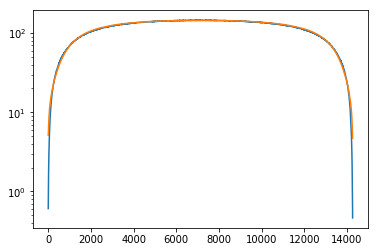

In [13]:
plt.plot(Te)
Nmid = int(len(Te)/2)
nesmooth = smooth(ne)
TePoly = Te[Nmid]*nesmooth[Nmid]**(1 - n)/(nesmooth**(1-n))

plt.semilogy(TePoly)

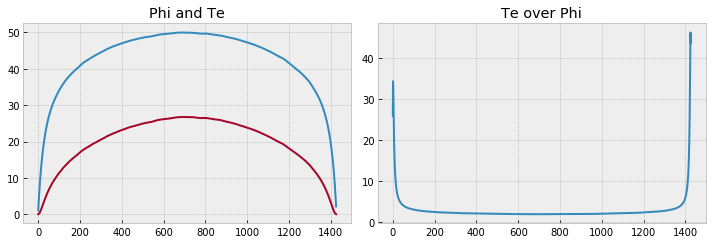

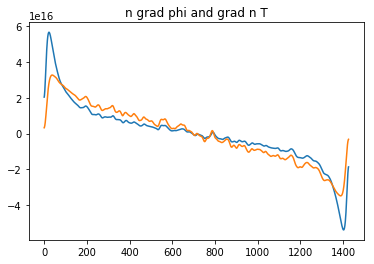

In [145]:
f = hp.File(fileName,"r")
Ncut = 1
Te = meanfield(f,"Te")[Ncut:-1-Ncut]
phi = meanfield(f,"phi")[Ncut:-1-Ncut]
ne = meanfield(f,"ne")[Ncut:-1-Ncut]

with plt.style.context("bmh"):

    plt.figure(figsize=(10,3.5))
    plt.subplot(121)
    plt.plot(phi)
    plt.plot(Te)
    plt.title("Phi and Te")
    plt.subplot(122)
    plt.plot((phi/Te))
    plt.title("Te over Phi")

plt.tight_layout()

plt.show()

ve = meanfield(f,"ve")[Ncut:-1-Ncut]

nT = ne*Te
plt.plot(smooth(ne*np.gradient(phi)))
plt.plot(smooth(np.gradient(nT)))
#plt.plot(smooth(np.gradient(me*ne[:-1]*ve**2)))
plt.title("n grad phi and grad n T")
print("")
f.close()

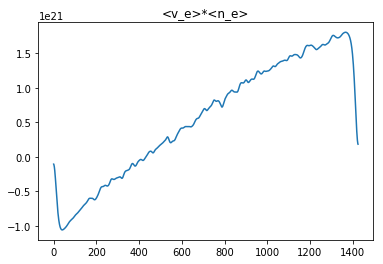

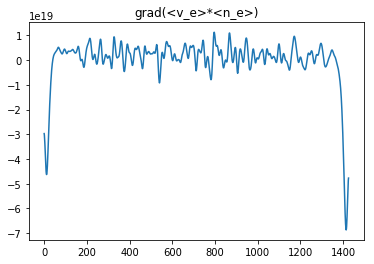

In [146]:
f = hp.File(fileName,"r")
ve = meanfield(f,"ve")[Ncut:-1-Ncut]

plt.title("<v_e>*<n_e>")
plt.plot(smooth(ve*ne))
plt.show()

plt.title("grad(<v_e>*<n_e>)")
plt.plot(smooth(np.gradient(ve*ne)))
f.close()

In [5]:
from __future__ import print_function
from IPython.display import display
from ipywidgets import *
from traitlets import *

%matplotlib inline

import numpy as np
import bqplot as bq
from bqplot import pyplot as plt

import h5py as hp

In [89]:
def init_display():
    fileName = "cases/inft_sh/runMirrorLonguer2.h5"
    f = hp.File(fileName,"r")

    lines = []
    xaxs = []
    yaxs = []
    colors = ['green']
    NX  = snap(0,f,"hist").size
    
    x_sc, y_sc = bq.LinearScale(), bq.LinearScale(min = 0, max = 1e4) 
    ax_x = bq.Axis(label='v', scale=x_sc, tick_format='2.1e')
    ax_y = bq.Axis(label='f(v)', scale=y_sc, orientation='vertical', tick_format='2.1e')
    
    color = colors[0]

    x = np.linspace(-1e7,1e7,NX)
    y = snap(0,f,"hist")

    line = bq.Lines(x=x, y=y, scales={'x': x_sc, 'y': y_sc}, colors = [color], line_style= 'solid')
    lines.append(line)

    line = bq.Lines(x=x, y=y, scales={'x': x_sc, 'y': y_sc}, colors = ['red'], line_style= 'solid')
    lines.append(line)        

    fig = bq.Figure(marks=lines, axes=[ax_x, ax_y], animation_duration=100)
    display(fig)
    
    return lines, f

In [90]:
def snap(i,f,key):
    """read the HDF5 file f in order to calculate the mean""
    """
    groupNames = [k for k in f.keys()]
    groupNames.sort(key=float)
    datasetNames = [k for k in f[groupNames[0]].keys()]
    
    if key not in datasetNames:
        raise NameError('Wrong HDF5 key for dataset !'+key+" is not in "+str(datasetNames) )
   
    tab = f[groupNames[i]][key][()]
        
    return tab

In [93]:
lines,f = init_display()
Nt = len([f for f in f.keys()]) - 1
dt =1e-12
print(Nt)
play = widgets.Play(
    value=0,
    min=0,
    max=Nt,
    step=1,
    description="Press play")

@interact(i=play)          # widgets.IntSlider(min=0,max=Nt,step=1,value=0,continuous_update=True))
def update_plot(i):

    Xvec = lines[0].x
    display(f"t = {i*dt:2.3e}s over {Nt*dt:2.1e}s")
    f_v = snap(i,f,"hist")
    lines[0].y = f_v
    plt.title(f"{i}")


Figure(animation_duration=100, axes=[Axis(label='v', scale=LinearScale(), tick_format='2.1e'), Axis(label='f(v)', orientation='vertical', scale=LinearScale(max=10000.0, min=0.0), tick_format='2.1e')], fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, layout=Layout(min_width='125px'), marks=[Lines(colors=['green'], interactions={'hover': 'tooltip'}, scales={'x': LinearScale(), 'y': LinearScale(max=10000.0, min=0.0)}, scales_metadata={'x': {'orientation': 'horizontal', 'dimension': 'x'}, 'y': {'orientation': 'vertical', 'dimension': 'y'}, 'color': {'dimension': 'color'}}, tooltip_style={'opacity': 0.9}, x=array([-10000000.        ,  -9797979.7979798 ,  -9595959.5959596 ,
        -9393939.39393939,  -9191919.19191919,  -8989898.98989899,
        -8787878.78787879,  -8585858.58585859,  -8383838.38383838,
        -8181818.18181818,  -7979797.97979798,  -7777777.77777778,
        -7575757.57575758,  -7373737.37373737,  -7171717.17171717,
        -6969696.96969697,  -6767676.76767677,  -6565656.56565657,
        -6363636.36363636,  -6161616.16161616,  -5959595.95959596,
        -5757575.75757576,  -5555555.55555556,  -5353535.35353535,
        -5151515.15151515,  -4949494.94949495,  -4747474.74747475,
        -4545454.54545455,  -4343434.34343434,  -4141414.14141414,
        -3939393.93939394,  -3737373.73737374,  -3535353.53535354,
        -3333333.33333333,  -3131313.13131313,  -2929292.92929293,
        -2727272.72727273,  -2525252.52525253,  -2323232.32323232,
        -2121212.12121212,  -1919191.91919192,  -1717171.71717172,
        -1515151.51515152,  -1313131.31313131,  -1111111.11111111,
         -909090.90909091,   -707070.70707071,   -505050.50505051,
         -303030.3030303 ,   -101010.1010101 ,    101010.1010101 ,
          303030.3030303 ,    505050.5050505 ,    707070.70707071,
          909090.90909091,   1111111.11111111,   1313131.31313131,
         1515151.51515151,   1717171.71717172,   1919191.91919192,
         2121212.12121212,   2323232.32323232,   2525252.52525252,
         2727272.72727273,   2929292.92929293,   3131313.13131313,
         3333333.33333333,   3535353.53535353,   3737373.73737374,
         3939393.93939394,   4141414.14141414,   4343434.34343434,
         4545454.54545454,   4747474.74747475,   4949494.94949495,
         5151515.15151515,   5353535.35353535,   5555555.55555555,
         5757575.75757576,   5959595.95959596,   6161616.16161616,
         6363636.36363636,   6565656.56565657,   6767676.76767677,
         6969696.96969697,   7171717.17171717,   7373737.37373737,
         7575757.57575757,   7777777.77777778,   7979797.97979798,
         8181818.18181818,   8383838.38383838,   8585858.58585858,
         8787878.78787879,   8989898.98989899,   9191919.19191919,
         9393939.39393939,   9595959.5959596 ,   9797979.7979798 ,
        10000000.        ]), y=array([9.50000000e-04, 6.00000000e-04, 5.00000000e-04, 2.75000000e-03,
       8.65000000e-03, 5.06000000e-02, 1.96275000e-01, 3.46200000e-01,
       4.53700000e-01, 8.02225000e-01, 1.26082500e+00, 1.61815000e+00,
       2.33772500e+00, 4.45075000e+00, 6.24347500e+00, 9.25100000e+00,
       1.40020750e+01, 1.96468750e+01, 2.80506250e+01, 3.79277000e+01,
       5.37643250e+01, 7.27704750e+01, 1.00894775e+02, 1.36733100e+02,
       1.71037400e+02, 2.18022775e+02, 3.00668375e+02, 3.93611350e+02,
       4.97788925e+02, 6.34962675e+02, 7.84745775e+02, 9.62438425e+02,
       1.19542340e+03, 1.47485278e+03, 1.75043057e+03, 2.08655292e+03,
       2.41827930e+03, 2.78126425e+03, 3.25413120e+03, 3.70736730e+03,
       4.22062513e+03, 4.75115135e+03, 5.26899107e+03, 5.79105048e+03,
       6.24706917e+03, 6.73124340e+03, 7.19267188e+03, 7.52699165e+03,
       7.77444125e+03, 8.00696480e+03, 8.17634198e+03, 8.25315515e+03,
       8.24456345e+03, 8.14902492e+03, 7.95759385e+03, 7.59130832e+03,
       7.24123895e+03, 6.86829565e+03, 6.43663660e+03, 6.01601410e+03,
       5.50702085e+03, 4.85410478e+03, 4.36401725e+03, 3.84844598e+03

2388


interactive(children=(Play(value=0, description='Press play', max=2388), Output()), _dom_classes=('widget-interact',))

In [96]:
slider = widgets.IntSlider(value=0,min=0,max=Nt,step=1,)
widgets.jslink((play, 'value'), (slider, 'value'))
w = widgets.HBox([play, slider])
display(w)

HBox(children=(Play(value=100, description='Press play', max=2388), IntSlider(value=0, max=2388)))